https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset/data

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:

df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


the dataset describes which crop is suitable to grow given certain chariteristics explained below. 

N – Nitrogen content in the soil (in mg/kg)<br>
P – Phosphorus content in the soil (in mg/kg)<br>
K – Potassium content in the soil (in mg/kg)<br>
temperature – Average temperature in °C<br>
humidity – Average relative humidity in %<br>
ph – Soil pH value<br>
rainfall – Rainfall in mm<br>
Label (Output):

In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


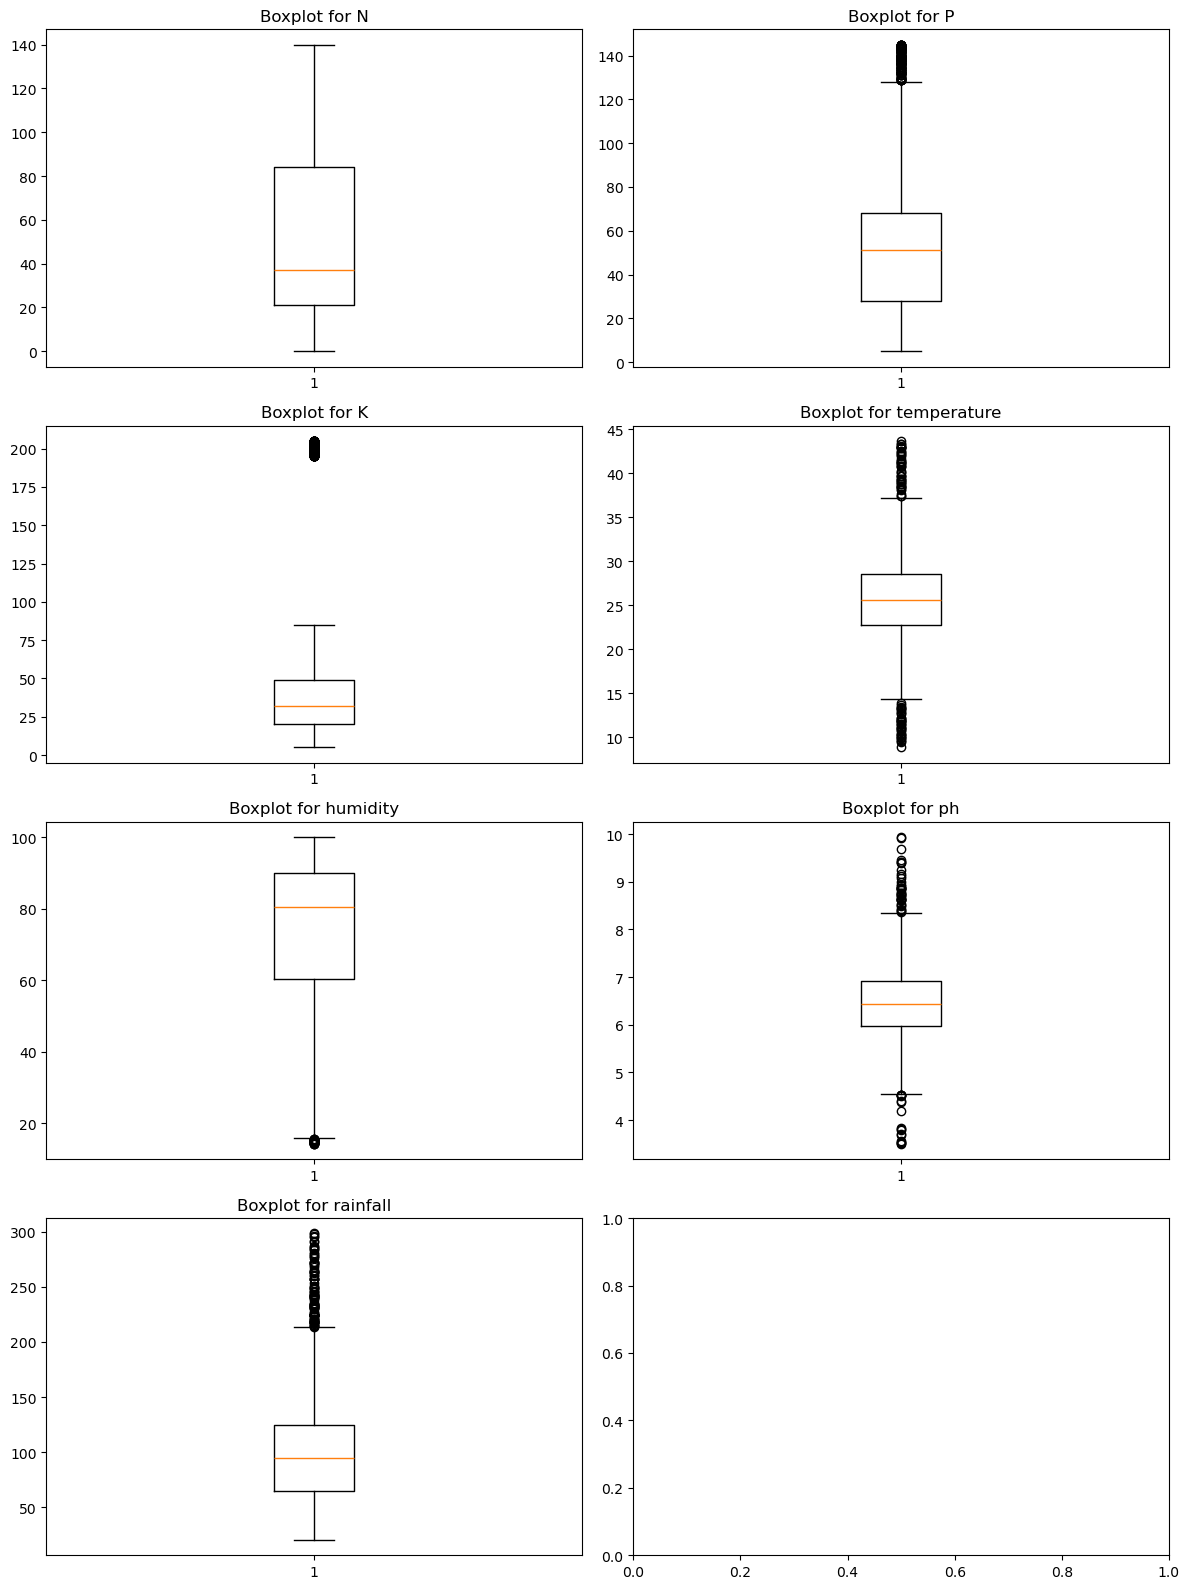

In [5]:
num_col = df.select_dtypes(include="number")
cols = num_col.columns
n = len(cols)
fig, axs = plt.subplots(4, 2, figsize=(12, 16)) 
axs = axs.ravel()
for i in range(n):
    axs[i].boxplot(df[cols[i]].dropna())
    axs[i].set_title(f"Boxplot for {cols[i]}")
plt.tight_layout()
plt.show()


lot of outliers

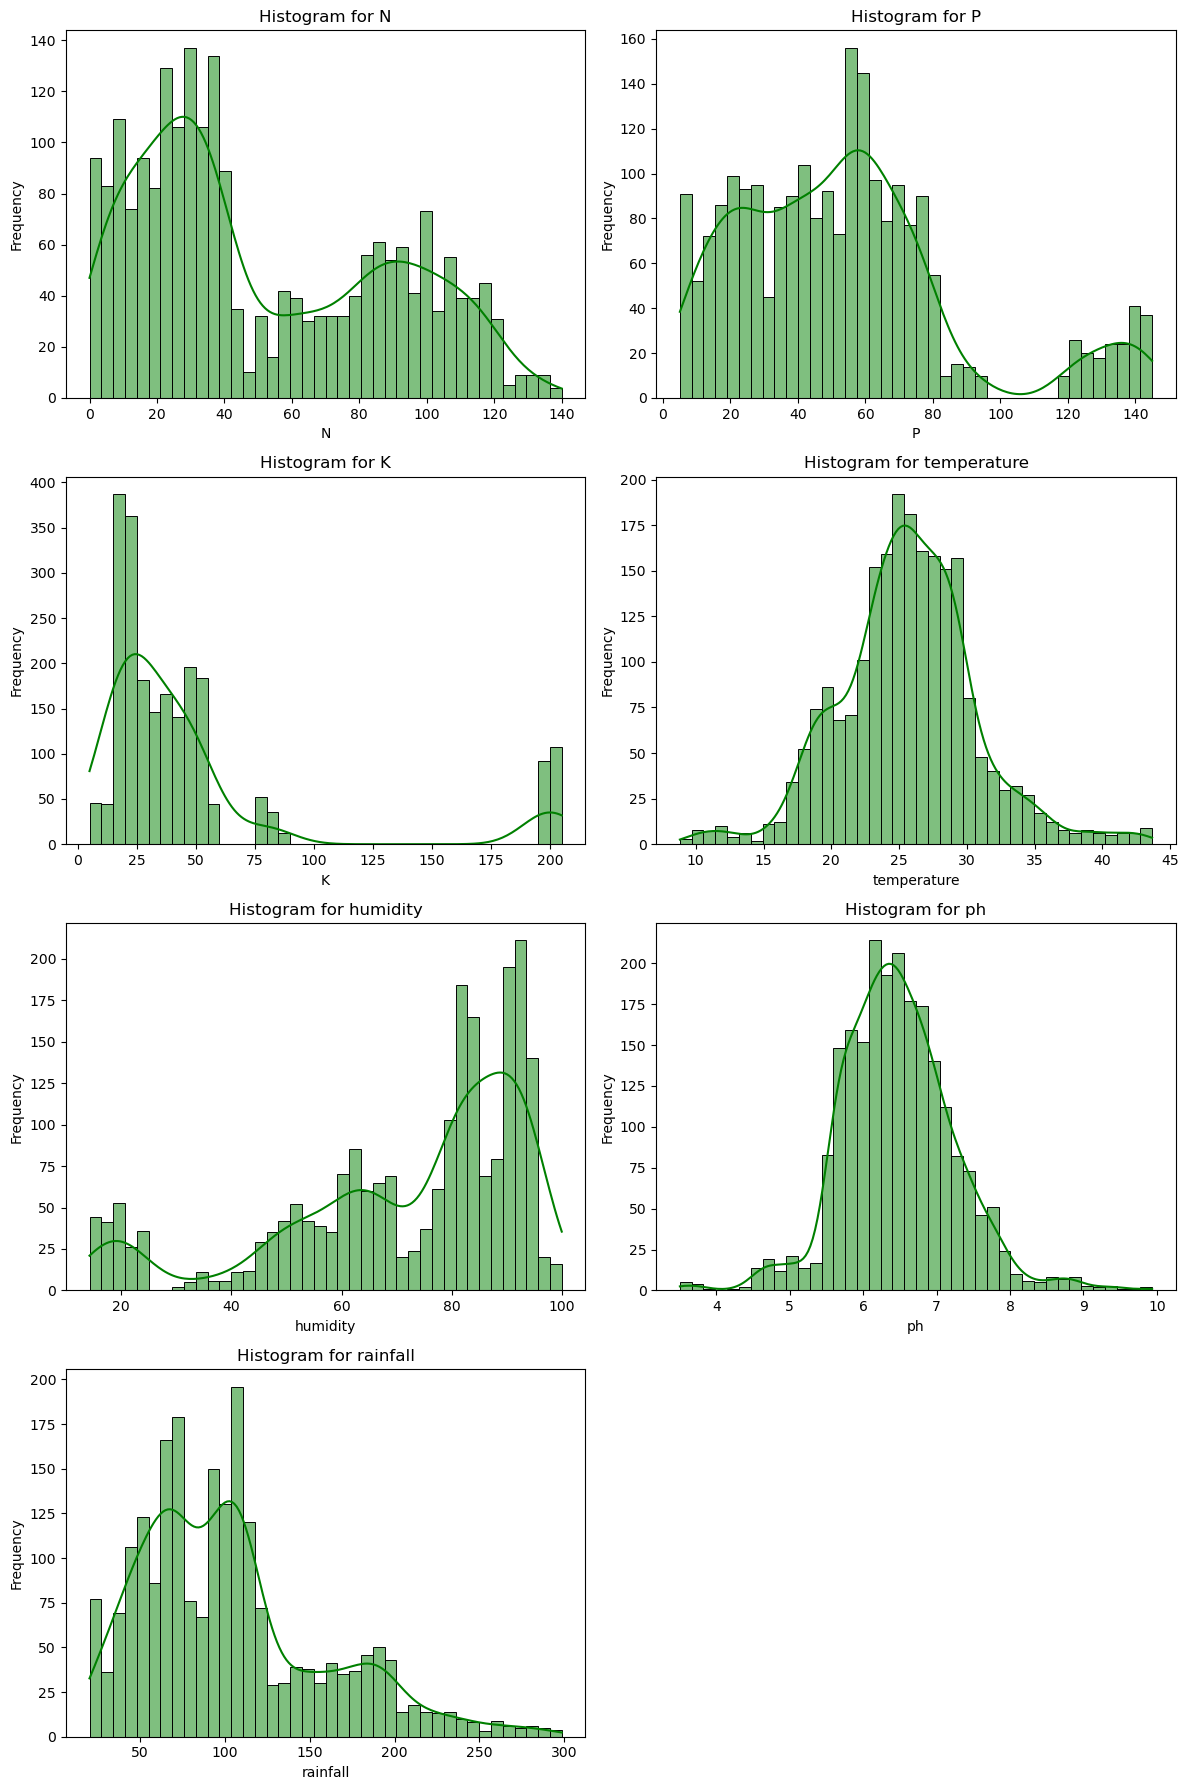

In [6]:
fig,axs=plt.subplots(4,2,figsize=(12,18))
axs=axs.ravel()
for i in range(n):
    sns.histplot(df[cols[i]], bins=40, kde=True, ax=axs[i], color="green")
    axs[i].set_title(f"Histogram for {cols[i]}")
    axs[i].set_ylabel("Frequency")
for j in range(n, len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

In [7]:
x = df.drop(columns=['label'])
y = df['label']

In [8]:
#Feature scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

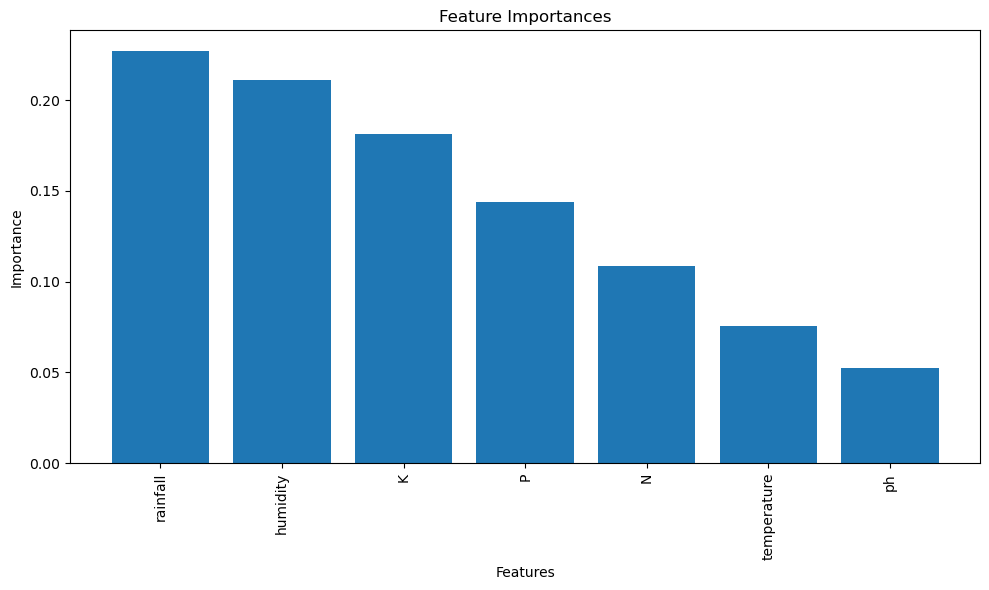

In [11]:
importances = rfc.feature_importances_
feature_names = df.drop(columns=['label']).columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
